# Chapter 3 - Classification

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
# data: array with one row per instance and one column per feature
# target: an array with labels
X, y = mnist["data"], mnist["target"]

# 70000 images with 784 features (28x28 pixels) each
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

**Display a digit**

Grabbing an instance's feature vector and reshaping it into a 28x28 array

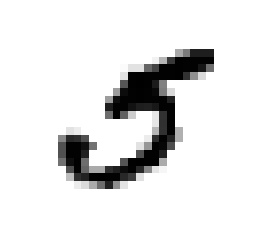

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

In [5]:
print("This was a", y[36000])

This was a 5.0


### Creating the sets

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Shuffling the sets to avoid similar instances in a row**

In [7]:
import numpy as np

# an array of numbers between 0-59999 (indexes)
shuffle_index = np.random.permutation(60000) 
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


### Stochastig Gradient Descent classifier

**Binary Classifier**, identifying if a digit is 5 or not.

In [8]:
y_train_5 = (y_train == 5) # 60000 bools
y_test_5 = (y_test == 5) # 10000 bools

SGD classifier

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

**Predicting a digit**

In [10]:
sgd_clf.predict([some_digit]) # the 5 we displayed earlier

array([ True])

### Evaluating the classifier (Performance Measure)

Evaluating a classifier is often significantly trickier than evaluating a regressor

K-fold cross-validation means splitting the training set into K-folds, then making predictions and evaluating them on each fold using a model trained on the remaining folds.

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

array([0.9592 , 0.96005, 0.96285])

Comparing the accuracy to a dumb classify-everything-as-not-5 class:

In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        #numpy 2d array of zeros
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91325, 0.90925, 0.90645])

**Confusion matrix > K-fold cross-validation** on classifier

In [14]:
from sklearn.model_selection import cross_val_predict

# performs K-fold cross-validation, but instead of returning the evaluation scores,
# it returns the predictions made on each test fold.
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53999,   580],
       [ 1778,  3643]])

Each row in c.matrix represents an actual class, while each column represents a predicted class.

The first row of this matrix considers non-5 images (**the negative class**): 51,391 of them were correctly classified as non-5s (*true negatives*), while the remaining 34,188 wrongly classified as 5s (*false positives*). 
The second row considers the images of 5s (**the positive class**): 1,458 were wrongly classified as non-5s (*false-negatives*), while the remaining 3,963 were correctly classified as 5s (*true positives*).

A perfect classifier would have only true positives and true negatives.  
[50000, 0],    
[0, 50000]

#### Equations

Precision of the classifier: $precision = \frac{TP}{TP + FP}$, the accuracy of the positive predictions  
TP = true positives, FP = false positives.

Recall / true positive rate: $recall = \frac{TP}{TP+FN}$, the ratio of positive instances that are correctly detected by the classifier.  
FN = false negatives.

In [16]:
from sklearn.metrics import precision_score, recall_score

print("Correct only", precision_score(y_train_5, y_train_pred), "of the time") 

Correct only 0.8626568789959744 of the time


In [17]:
print("Only detects", recall_score(y_train_5, y_train_pred), "of the 5s")

Only detects 0.6720162331673123 of the 5s


**F1 score** is precision and recall combined into a single metric. The F1 score is the *harmonic mean* of precision and recall; gives much more weight to low values (regular mean treats all values equally). High scores show only when both recall and precision is high.

In [18]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7554956449605972

### Classifier score and threshold

Customizing threshold: increase to raise precision (but also decrease recall)

In [19]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([10645.8614623])

In [20]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Increasing the threshold enough so that the score isn't high enough to classify it as a 5.

In [21]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

**Picking a good threshold:** Gather all the descision scores (not predicitions) and compute recall/precision for all possible thresholds.

In [22]:
from sklearn.metrics import precision_recall_curve

# the scores of all instances in the training set
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

#### The relationship between precision, recall and threshold:

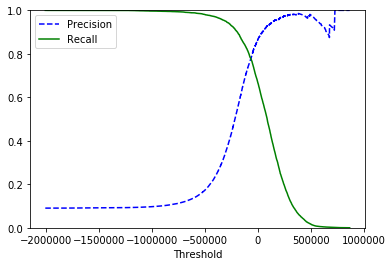

In [24]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

**Plotting recall against precision**

<function matplotlib.pyplot.show(*args, **kw)>

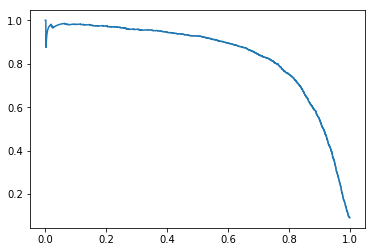

In [25]:
plt.plot(recalls, precisions)
plt.show

Picking 90% as our predictions value we need a 70.000 threshold (from the graph)

In [26]:
y_train_pred_90 = (y_scores > 70000)

Checking the scores based on our threshold

In [27]:
precision_score(y_train_5, y_train_pred_90)

0.9167969971848609

In [28]:
recall_score(y_train_5, y_train_pred_90)

0.5406751521859435

#### The *receiver operating characteristic* (ROC) curve

The true positive rate (recall) against the false positive rate.

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

The higher the recall (true posisitve rate), the more false positives (false positive rate) the classifier produces.

<function matplotlib.pyplot.show(*args, **kw)>

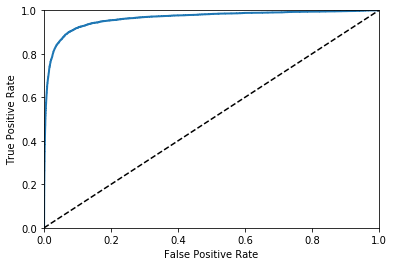

In [31]:
plot_roc_curve(fpr, tpr)
plt.show

**Computing the ROC *area under the curve* (AUC)** where 1 is a perfect classifier (the curve follows the top-left end of the graph) and 0.5 is a purely random classifier following the linear line in the middle.

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9635474281699586

### When to use the PR curve over the ROC curve

As a rule of thumb, the PR is preffered when you care more about the false positives than the false negatives, and the ROC otherwise.

---

Comparing scores between SGD classifier and Random Forest classifier.

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
# returns an array containing a row per instance and a column per class, 
# each containing the probability that the given instance belongs to the 
# given class (e.g. 70% chance the image represents a 5)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                   method = "predict_proba")

To compensate for that we don't have scores here we use the positive class' probability as the score

In [37]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

/home/adrian/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


<function matplotlib.pyplot.show(*args, **kw)>

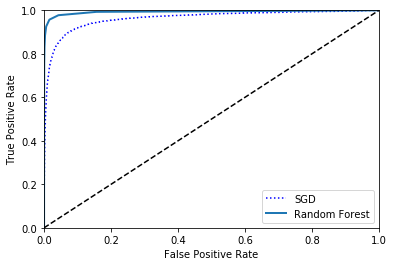

In [38]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show